In [1]:
import json
import numpy as np

In [5]:
from joblib import load

file_path = '../knowledgebase/labeled_encoded_queries.jsonl'
model_path = '../../semantic_classifier.joblib'
embedder_path = '../../semantic_embedder.joblib'

In [10]:
with open(file_path, 'r') as f:
    data = [json.loads(line) for line in f]

In [11]:
queries = [item["query"] for item in data]
labels = [item["label_encoded"] for item in data]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    queries, labels, test_size=0.2, random_state=42, stratify=labels)

In [8]:
model = load(model_path)
embedder = load(embedder_path)

In [13]:
X_test_embeddings = embedder.encode(X_test, convert_to_numpy=True, show_progress_bar=True)

Batches: 100%|██████████| 73/73 [00:12<00:00,  5.78it/s]


In [14]:
y_pred = model.predict(X_test_embeddings)

In [15]:
from sklearn.metrics import classification_report
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["dense", "sparse", "hybrid"]))

📊 Classification Report:

              precision    recall  f1-score   support

       dense       0.89      0.75      0.81      1505
      sparse       0.00      0.00      0.00         2
      hybrid       0.64      0.81      0.71       799

    accuracy                           0.77      2306
   macro avg       0.51      0.52      0.51      2306
weighted avg       0.80      0.77      0.78      2306



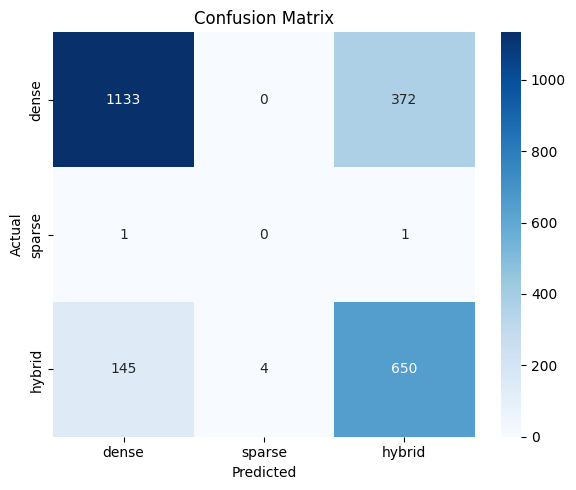

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
labels_names = ["dense", "sparse", "hybrid"]

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels = labels_names,
            yticklabels = labels_names, cmap = "Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()